In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# load the dataframe

In [2]:
df = pd.read_csv("/Users/fynn/Uni/DL4NLP/data/Annotationen-Stufe-2.txt", index_col=0)
df.drop(["Seite", "Unnamed: 2",
         "Semantikerweiterung?",
         "Unersetzlich?",
         "Unersetzlich?",
         "sprachlich irregulär?",
         "pointiert?"], axis = 1, inplace = True) # 2x Floskel

df = df[~df.Textstelle.isnull()]
df

df.head()

,Textstelle,Metapher?,Fokus,Rahmen,"Stärkegrad (A, B, C)",Begründung/Kommentar,Annotator
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,das Horoskop stellen,einer Nation,B,Horoskop stellen - bezogen auf Nationen ist da...,B
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN,NaN,Fachausdruck,B
2,"Diese wolle die bittere Auslese, ohne die auc...",Metapher,bittere,Auslese,A,"Unauffällig, aber doch metaphorisch: Dass eine...",B
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",Metapher,ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,A,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B
4,In Californien ist ebenso die früher dort hei...,Metaphernkandidat,NaN,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B


In [3]:
df["Metapher?"].value_counts()

Metaphernkandidat    1785
Metapher              777
Unklar                  3
Grenzfall               1
Name: Metapher?, dtype: int64

In [4]:
df["Metapher"] = (df["Metapher?"] == "Metapher")
df["Kandidat"] = (df["Metapher?"] == "Metaphernkandidat")
df.drop("Metapher?", axis=1, inplace = True)
df

,Textstelle,Fokus,Rahmen,"Stärkegrad (A, B, C)",Begründung/Kommentar,Annotator,Metapher,Kandidat
0,Bei Beobachtung solchen moralischen Wertes ka...,das Horoskop stellen,einer Nation,B,Horoskop stellen - bezogen auf Nationen ist da...,B,True,False
1,Die Zellen verschmelzen miteinander.,NaN,NaN,NaN,Fachausdruck,B,False,True
2,"Diese wolle die bittere Auslese, ohne die auc...",bittere,Auslese,A,"Unauffällig, aber doch metaphorisch: Dass eine...",B,True,False
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,A,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B,True,False
4,In Californien ist ebenso die früher dort hei...,NaN,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B,False,True
...,...,...,...,...,...,...,...,...
2579,In ähnlicher Weise sollen noch mehrere andere ...,NaN,NaN,NaN,NaN,B,False,True
2580,"Die Amerikaner folgern, da sie alle Rohmateria...",einer turmhohen Mauer,Schutzzöllen,A,NaN,B,True,False
2581,Sie könne bei ihrer jetzigen großen Kraft und ...,mütterlichen Päppelflasche,Sie,B,NaN,B,True,False
2582,"Schwarze Flecken von Habgier, Raubsucht, Unger...",NaN,NaN,NaN,NaN,B,False,True


In [5]:
stelle = "Der politische Körper verwendet in beiden Fällen seine meiste Kraft"
stelle +=" auf die Zunahme von Zähnen und Krallen."
clms = ["Textstelle", "Annotator", "Metapher", "Kandidat"]
df.loc[ [stelle in text for text in df["Textstelle"]], clms]

,Textstelle,Annotator,Metapher,Kandidat
378,"""Der politische Körper verwendet in beiden Fä...",B,True,False
958,"""Der politische Körper verwendet in beiden Fä...",K,True,False
1406,"""Der politische Körper verwendet in beiden Fä...",A,False,True


In [6]:
data = df.groupby(["Textstelle"])[["Metapher", "Kandidat"]].sum()
data

,Metapher,Kandidat
Textstelle,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",2,1
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",0,3
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",0,3
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""",1,2
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",0,3
...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.",0,3
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.",1,2
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.",2,1


In [7]:
erklärung = df.groupby(["Textstelle"])[["Fokus", "Rahmen"]].first()
erklärung[erklärung.isnull()] = np.nan
erklärung

,Fokus,Rahmen
Textstelle,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",Zähnen und Krallen,der politische Körper
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",NaN,NaN
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",NaN,NaN
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""","Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",NaN,NaN
...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.",NaN,NaN
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.",verstellbare Puppen,staatliche Menschenverhältnisse
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.",schwindsüchtig ist,daß eine Philosophie


In [8]:
data = data.merge(erklärung, on = "Textstelle")
data

,Metapher,Kandidat,Fokus,Rahmen
Textstelle,,,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",2,1,Zähnen und Krallen,der politische Körper
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",0,3,NaN,NaN
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",0,3,NaN,NaN
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""",1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",0,3,NaN,NaN
...,...,...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.",0,3,NaN,NaN
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.",1,2,verstellbare Puppen,staatliche Menschenverhältnisse
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.",2,1,schwindsüchtig ist,daß eine Philosophie


In [9]:
text = data.index[4]
text = text.replace('"', '')
text

' Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden,'

In [10]:
def eliminate_substring(text, k=20):
    for ii in range(len(text)):
        remaining_text = text[ii:]
        
        jj = k
        while remaining_text[:jj] in remaining_text[jj:]:

            jj+=1
        if jj > k:
            #print(jj)
            return text[:ii] + remaining_text[jj-1:]
    # if we find no substring, just give the text back
    return text

In [11]:
eliminate_substring(text)

' Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden,'

In [12]:
text = data.index[6]
text

' "Wir behaupten nicht, daß die Bildung der einzige Faktor sei, der die Geburtenziffer verkleinert; sie ist nur einer dieser Faktoren, der, verbunden mit materieller Bequem- ziffer verkleinert; sie ist nur einer dieser Faktoren, der, verbunden mit materieller Bequemlichkeit, mit weniger lebhaften und weniger wahmehmbaren religiösen Gefühlen und mit lichkeit, mit weniger lebhaften und weniger wahmehmbaren religiösen Gefühlen und mit dem heißen Wunsch, in materieller Beziehung auf einen höheren und besseren Fuß zu kommen, solche intellektuelle und moralische Eigenschaften anhäuft, die für eine hohe Geburtenziffer wenig günstig sind . . . . burtenziffer wenig günstig sind . . . . '

In [13]:
text = eliminate_substring(text)
text = eliminate_substring(text)
text = eliminate_substring(text)
text = eliminate_substring(text)
text

' "Wir behaupten nicht, daß die Bildung der einzige Faktor sei, der die Geburten- ziffer verkleinert; sie ist nur einer dieser Faktoren, der, verbunden mit materieller Bequemlichkeit, mit weniger lebhaften und weniger wahmehmbaren religiösen Gefühlen und mit dem heißen Wunsch, in materieller Beziehung auf einen höheren und besseren Fuß zu kommen, solche intellektuelle und moralische Eigenschaften anhäuft, die für eine hohe Geburtenziffer wenig günstig sind . . . . '

In [14]:
data.reset_index(inplace = True)
data["Textstelle"] = data.Textstelle.str.replace('"', '')
data

,Textstelle,Metapher,Kandidat,Fokus,Rahmen
0,Der politische Körper verwendet in beiden Fäl...,2,1,Zähnen und Krallen,der politische Körper
1,Immer noch wird durch die protestantische Leh...,0,3,NaN,NaN
2,"Kein Zweifel, schreibt Alb. Schaeffle 1), vor...",0,3,NaN,NaN
3,Mit je weiterem Blick wir die Stoffwelt zu üb...,1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal
4,Solange das Menschengeschlecht seinen Zerstör...,0,3,NaN,NaN
...,...,...,...,...,...
801,verlaufs; sie hat Naturforschung in dem von un...,0,3,NaN,NaN
802,wenn wir uns ein Prinzip denken und auf Grund ...,1,2,verstellbare Puppen,staatliche Menschenverhältnisse
803,wenn wir von dem schlechten Worte »Rechtsphilo...,2,1,schwindsüchtig ist,daß eine Philosophie
804,"»Die Macht, die das Kabinett hat, auf die vers...",0,2,NaN,NaN


261.7406947890819
242.83374689826303


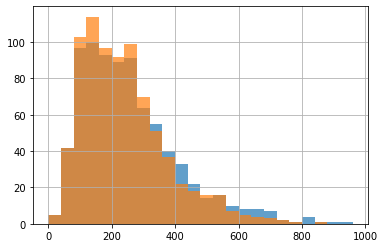

In [15]:
bins = np.arange(0, 1000, 40)

data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

data["Kürzungen"] = 0

for i in range(6):
    new_data = data["Textstelle"].apply(eliminate_substring)
    data["Kürzungen"] += (data["Textstelle"] != new_data)
    data["Textstelle"] = new_data

data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

In [16]:
data["Kürzungen"].value_counts()

0    631
1    129
2     35
3      8
4      3
Name: Kürzungen, dtype: int64

In [17]:
data.drop("Kürzungen", axis=1, inplace = True)

/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_18965/3024723689.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\d', '')


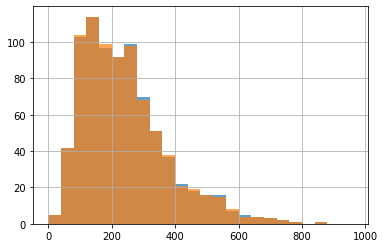

In [18]:
#remove digits
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r'\d', '')
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_18965/1782542012.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\[', '')
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_18965/1782542012.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\]', '')


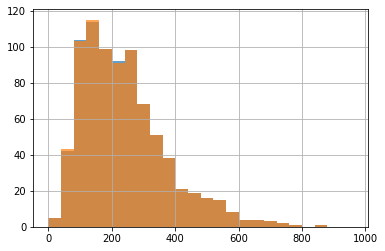

In [19]:
# remove brackets:
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r'\[', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\]', '')
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

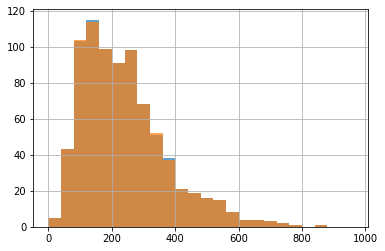

In [20]:
# remove quotation marks
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r'»', '')
data["Textstelle"] = data.Textstelle.str.replace(r'«', '')
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

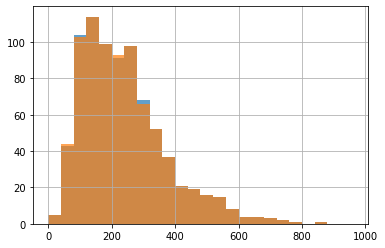

In [21]:
# remove special characters
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r':', '')
data["Textstelle"] = data.Textstelle.str.replace(r';', '')
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_18965/4211750291.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_18965/4211750291.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_18965/4211750291.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")


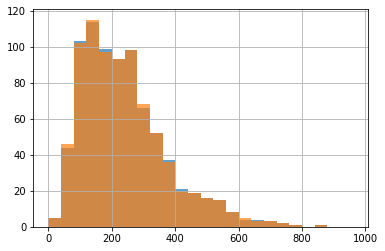

In [22]:
# remove leading/trailing whitespace
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

# Can we find the Fokus inside the Textstelle?

This is harder than it appears at first, since most

In [23]:
data

,Textstelle,Metapher,Kandidat,Fokus,Rahmen
0,Der politische Körper verwendet in beiden Fäll...,2,1,Zähnen und Krallen,der politische Körper
1,Immer noch wird durch die protestantische Lehr...,0,3,NaN,NaN
2,"Kein Zweifel, schreibt Alb. Schaeffle ), vorau...",0,3,NaN,NaN
3,Mit je weiterem Blick wir die Stoffwelt zu übe...,1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal
4,Solange das Menschengeschlecht seinen Zerstöre...,0,3,NaN,NaN
...,...,...,...,...,...
801,verlaufs sie hat Naturforschung in dem von uns...,0,3,NaN,NaN
802,wenn wir uns ein Prinzip denken und auf Grund ...,1,2,verstellbare Puppen,staatliche Menschenverhältnisse
803,wenn wir von dem schlechten Worte Rechtsphilof...,2,1,schwindsüchtig ist,daß eine Philosophie
804,"Die Macht, die das Kabinett hat, auf die versc...",0,2,NaN,NaN


In [24]:
idx = 3
print(data.Textstelle[idx])

Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.


In [25]:
blacklist = ["und", "ist"]

Foki = data.Fokus.str.replace(", ", " ")


In [26]:
stelle = data.Textstelle.str.split(r'\.|\s|,')[idx]
#stelle

stelle = data.Textstelle.str.split(r'\s')[idx]
stelle

['Mit',
 'je',
 'weiterem',
 'Blick',
 'wir',
 'die',
 'Stoffwelt',
 'zu',
 'überschauen',
 'lernen,',
 'je',
 'klarer',
 'wir',
 'das',
 'wirkliche',
 'Verhältnis',
 'bemessen,',
 'in',
 'welchem',
 'der',
 'Mensch',
 'und',
 'sein',
 'Handeln',
 'zu',
 'dem',
 'harmonischen',
 'Ganzen',
 'steht,',
 'umsomehr',
 'verzwergt',
 'und',
 'entkleidet',
 'sich',
 'unser',
 'praktisches',
 'Ideal,',
 'bis',
 'wir',
 'die',
 'Neigung',
 'zu',
 'der',
 'Frage',
 'verspüren,',
 'ob',
 'ein',
 'so',
 'vergängliches',
 'und',
 'bedeutungsloses',
 'Ereignis',
 'in',
 'der',
 'allgemeinen',
 'Ordnung',
 'der',
 'Dinge,',
 'wie',
 'die',
 'Schicksale',
 'der',
 'Menschenrasse',
 'es',
 'sind,',
 'die',
 'Sehnsucht',
 'und',
 'die',
 'Gefühle',
 'noch',
 'befriedigen',
 'kann,',
 'die',
 'groß',
 'geworden',
 'sind',
 'an',
 'dem',
 'Glauben',
 'an',
 'das',
 'Ewige',
 'und',
 'Gott.']

In [27]:
fokus = data.Fokus.str.split()[idx]
fokus

['Stoffwelt,', 'verzwergt', 'und', 'entkleidet']

In [28]:
[word in fokus for word in stelle]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False]

In [29]:
stelle

['Mit',
 'je',
 'weiterem',
 'Blick',
 'wir',
 'die',
 'Stoffwelt',
 'zu',
 'überschauen',
 'lernen,',
 'je',
 'klarer',
 'wir',
 'das',
 'wirkliche',
 'Verhältnis',
 'bemessen,',
 'in',
 'welchem',
 'der',
 'Mensch',
 'und',
 'sein',
 'Handeln',
 'zu',
 'dem',
 'harmonischen',
 'Ganzen',
 'steht,',
 'umsomehr',
 'verzwergt',
 'und',
 'entkleidet',
 'sich',
 'unser',
 'praktisches',
 'Ideal,',
 'bis',
 'wir',
 'die',
 'Neigung',
 'zu',
 'der',
 'Frage',
 'verspüren,',
 'ob',
 'ein',
 'so',
 'vergängliches',
 'und',
 'bedeutungsloses',
 'Ereignis',
 'in',
 'der',
 'allgemeinen',
 'Ordnung',
 'der',
 'Dinge,',
 'wie',
 'die',
 'Schicksale',
 'der',
 'Menschenrasse',
 'es',
 'sind,',
 'die',
 'Sehnsucht',
 'und',
 'die',
 'Gefühle',
 'noch',
 'befriedigen',
 'kann,',
 'die',
 'groß',
 'geworden',
 'sind',
 'an',
 'dem',
 'Glauben',
 'an',
 'das',
 'Ewige',
 'und',
 'Gott.']

In [30]:
maske = " ".join(stelle[:-2] ) + " [MASK] " + " ".join(stelle[-1:]) + "."
maske

'Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige [MASK] Gott..'

In [31]:
for i, wort in enumerate(stelle):
    maske = " ".join(stelle[:i] ) + " [MASK] " + " ".join(stelle[i+1:]) + "."
    
    print(maske)
    

 [MASK] je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott..
Mit [MASK] weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und

# load the BERT-Redewiedergabe

In [32]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("redewiedergabe/bert-base-historical-german-rw-cased")
print("loaded tokenizer")
model = AutoModelForMaskedLM.from_pretrained("redewiedergabe/bert-base-historical-german-rw-cased")

loaded tokenizer


Some weights of the model checkpoint at redewiedergabe/bert-base-historical-german-rw-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
inputs = tokenizer(maske, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits


mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]

# change from zero to tokenizer(Fokus Wort)
predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)
tokenizer.decode(predicted_token_id)



'Große'

In [34]:
inputs = tokenizer("Was machen [MASK].", return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits


mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]

# change from zero to tokenizer(Fokus Wort)
predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)
tokenizer.decode(predicted_token_id)



'Sie'

In [35]:
blacklist = ["und", " ", "", ",", ", "]

for i, wort in enumerate(stelle):
    
    if wort in blacklist:
        continue
        
    maske = " ".join(stelle[:i] ) + " [MASK] " + " ".join(stelle[i+1:]) + "."
    
    #strip double whitespace which leads to weird predictions
    maske.replace(" +", ' ')
    
    print(maske)
    if wort in fokus: print("METAPHER!")
    
    inputs = tokenizer(maske, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    word_token_index = tokenizer(wort).input_ids[1:-1]; #print(word_token_index)
    mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]

    # change from zero to tokenizer(Fokus Wort)
    predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)
    logits = logits[0, mask_token_index]
    logits = torch.squeeze(logits)
    logits = logits.numpy()
    logits = np.argsort(logits)
    logits = logits[::-1]
    locs = np.isin(logits, word_token_index)
    #print(locs)
    print(np.where(locs)[0])
    
    #actual_token_id 
    print(wort)
    #print(tokenizer.decode(predicted_token_id))
    for j in range(5):
        print(tokenizer.decode(logits[j]), end = "\t")
    print("-")
    print("-")

 [MASK] je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott..
[0]
Mit
Mit	mit	Aber	Und	In	-
-
Mit [MASK] weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschen

[259 395]
wirkliche
innere	ganze	allgemeine	natürliche	geistige	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche [MASK] bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott..
[0]
Verhältnis
Verhältnis	Verhältnisse	Zusammenhang	Gleichgewicht	Interesse	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis [MASK] in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergänglich

[ 1136  3248 18003]
verzwergt
entwickelt	erweitert	ändert	erhebt	löst	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und [MASK] sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott..
METAPHER!
[ 1437  2976 29357]
entkleidet
erweitert	entwickelt	gestaltet	ändert	verändert	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet [MASK] unser praktisches Ideal, bis wir die Neigung zu der Frage verspüre

[0]
ein
ein	kein	noch	etwas	Ein	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein [MASK] vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott..
[0]
so
so	solches	ebenso	ganz	völlig	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so [MASK] und bedeutungsloses Ereignis in der allgemeinen Ordnung der Ding

[    0 17747]
Menschenrasse
Menschen	Völker	Dinge	Menschheit	Welt	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse [MASK] sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott..
[2]
es
verschieden	geworden	es	##n	entstanden	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungs

[0]
dem
dem	unserem	ihrem	diesem	einem	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem [MASK] an das Ewige und Gott..
[0]
Glauben
Glauben	Gedanken	Appell	Denken	Gedanke	-
-
Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allge